In [ ]:
#from keras.datasets.mnist import load_data
from keras.datasets.cifar10 import load_data

import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models



In [ ]:
train_digits.shape

(50000, 32, 32, 3)

In [ ]:
# load the data - it returns 2 tuples of digits & labels - one for
# the train set & the other for the test set
(train_digits, train_labels), (test_digits, test_labels) = load_data()
#  some variables...
image_height = train_digits.shape[1]  
image_width = train_digits.shape[2]
num_channels = 3 


train_data=train_digits
test_data=test_digits

# re-scale the image data to values between [0,1]
train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.


num_classes = 10
train_labels_cat = to_categorical(train_labels,num_classes)
test_labels_cat = to_categorical(test_labels,num_classes)

# split training set into training and validation
train_data2, val_data,train_labels_cat2,  val_labels = train_test_split(train_data, train_labels_cat, test_size=0.2)

170508288/170498071 [==============================] - 13s 0us/step


In [ ]:
#n_train_data = np.expand_dims(train_data, -1)
#n_train_data.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization

def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu',  input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
model=define_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_data2, train_labels_cat2, 
                    epochs=100, batch_size=64,
                    validation_data=(val_data, val_labels))

Epoch 1/100
625/625 [==============================] - 24s 37ms/step - loss: 2.1536 - accuracy: 0.3076 - val_loss: 1.4980 - val_accuracy: 0.4514
Epoch 2/100
625/625 [==============================] - 23s 37ms/step - loss: 1.5918 - accuracy: 0.4245 - val_loss: 1.4227 - val_accuracy: 0.4908
Epoch 3/100
625/625 [==============================] - 23s 36ms/step - loss: 1.4475 - accuracy: 0.4800 - val_loss: 1.3282 - val_accuracy: 0.5216
Epoch 4/100
625/625 [==============================] - 23s 37ms/step - loss: 1.3694 - accuracy: 0.5074 - val_loss: 1.3787 - val_accuracy: 0.5036
Epoch 5/100
625/625 [==============================] - 24s 38ms/step - loss: 1.3008 - accuracy: 0.5330 - val_loss: 1.1887 - val_accuracy: 0.5739
Epoch 6/100
625/625 [==============================] - 23s 37ms/step - loss: 1.2476 - accuracy: 0.5497 - val_loss: 1.1496 - val_accuracy: 0.5868
Epoch 7/100
625/625 [==============================] - 23s 37ms/step - loss: 1.1898 - accuracy: 0.5753 - val_loss: 1.1634 - val_ac

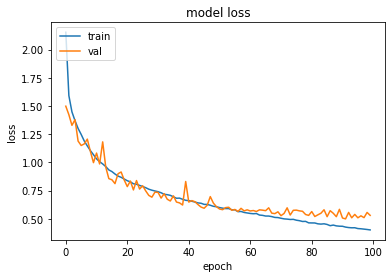

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels_cat, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

157/157 [==============================] - 2s 11ms/step - loss: 0.5461 - accuracy: 0.8210
Test loss: 0.5461 accuracy: 0.8210
